In [2]:
import pandas as pd
df = pd.read_json('data/data.json')
df.head()

,title,date,venue,category,location
0,Seattle Boat Show,2024-02-10T00:00:00-08:00,Lumen Field,Festivals & Special Events,Pioneer Square
1,Randall Goosby Plays Mozart,2024-02-10T00:00:00-08:00,Benaroya Hall,Music,Downtown
2,Art by Design,2024-02-10T00:00:00-08:00,Seattle Design Center,Visual Arts & Galleries,Downtown
3,The Love Show,2024-02-10T00:00:00-08:00,The Royal Room,Theatre,South Seattle
4,Brazilian Carnaval 2024,2024-02-10T00:00:00-08:00,The Crocodile,Music,Downtown


In [3]:
df[df.title.str.startswith('An Evening')]

,title,date,venue,category,location
20,An Evening with Lucia Micarelli,2024-02-13T00:00:00-08:00,Dimitriou's Jazz Alley,Music,Downtown
24,An Evening with Lucia Micarelli :A Valentine’s...,2024-02-14T00:00:00-08:00,Dimitriou's Jazz Alley,Music,Downtown
282,An Evening with Jinjoo Cho,2024-04-19T00:00:00-07:00,415 Westlake,Music,Queen Anne / Seattle Center


In [5]:
import html

In [7]:
df['category'].apply(lambda x: html.unescape(x))

0      Festivals & Special Events
1                           Music
2         Visual Arts & Galleries
3                         Theatre
4                           Music
                  ...            
364    Festivals & Special Events
365    Festivals & Special Events
366    Festivals & Special Events
367                        Sports
368                        Sports
Name: category, Length: 369, dtype: object

In [8]:
df.value_counts('category')

category
Music                         176
Sports                         49
Museums                        40
Festivals & Special Events     39
Theatre                        34
Readings & Lectures            20
Dance                           7
Visual Arts & Galleries         3
Film & Media Arts               1
Name: count, dtype: int64

In [9]:
df.value_counts('location')

location
Downtown                           141
Queen Anne / Seattle Center         79
Capitol Hill / Central District     33
Fremont / Ballard                   33
Pioneer Square                      26
South Seattle                       15
University District                 12
South                               11
Wallingford / Greenlake              6
Bellevue / Eastside                  4
West                                 4
International District               3
North                                1
West Seattle                         1
Name: count, dtype: int64

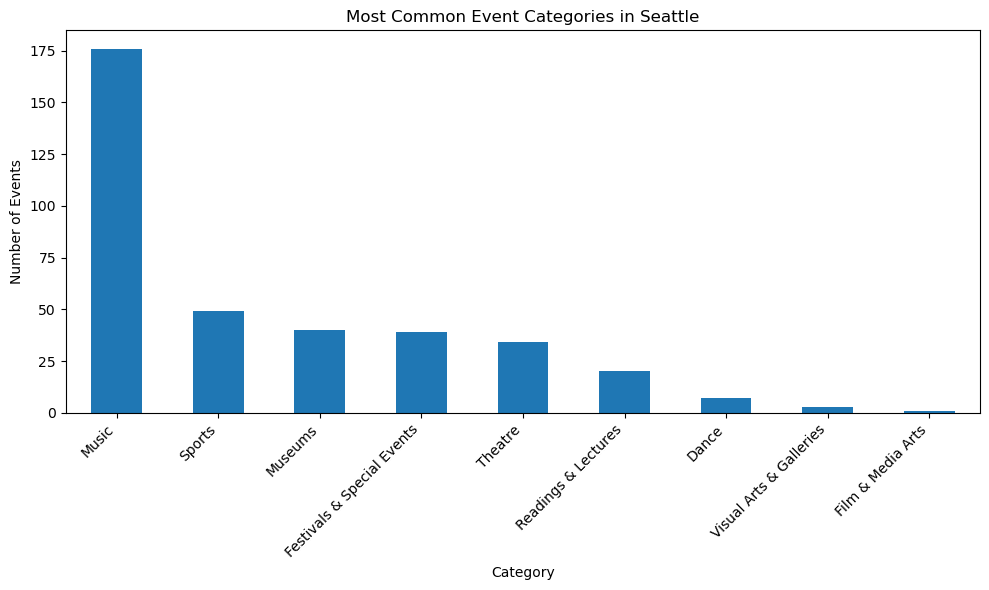

In [23]:
import matplotlib.pyplot as plt
category_chart = df['category'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Most Common Event Categories in Seattle')
plt.xlabel('Category')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


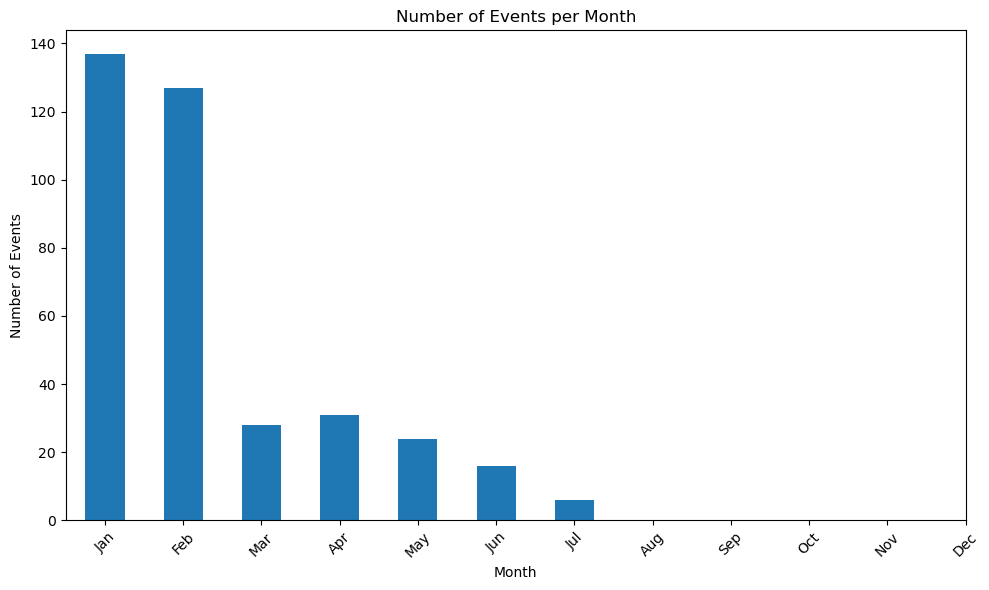

In [24]:
from datetime import datetime

df['date'] = pd.to_datetime(df['date'], utc=True)
df['date'] = df['date'].dt.tz_convert('US/Pacific')
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday

month_chart = df['month'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Number of Events per Month')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()
plt.show()

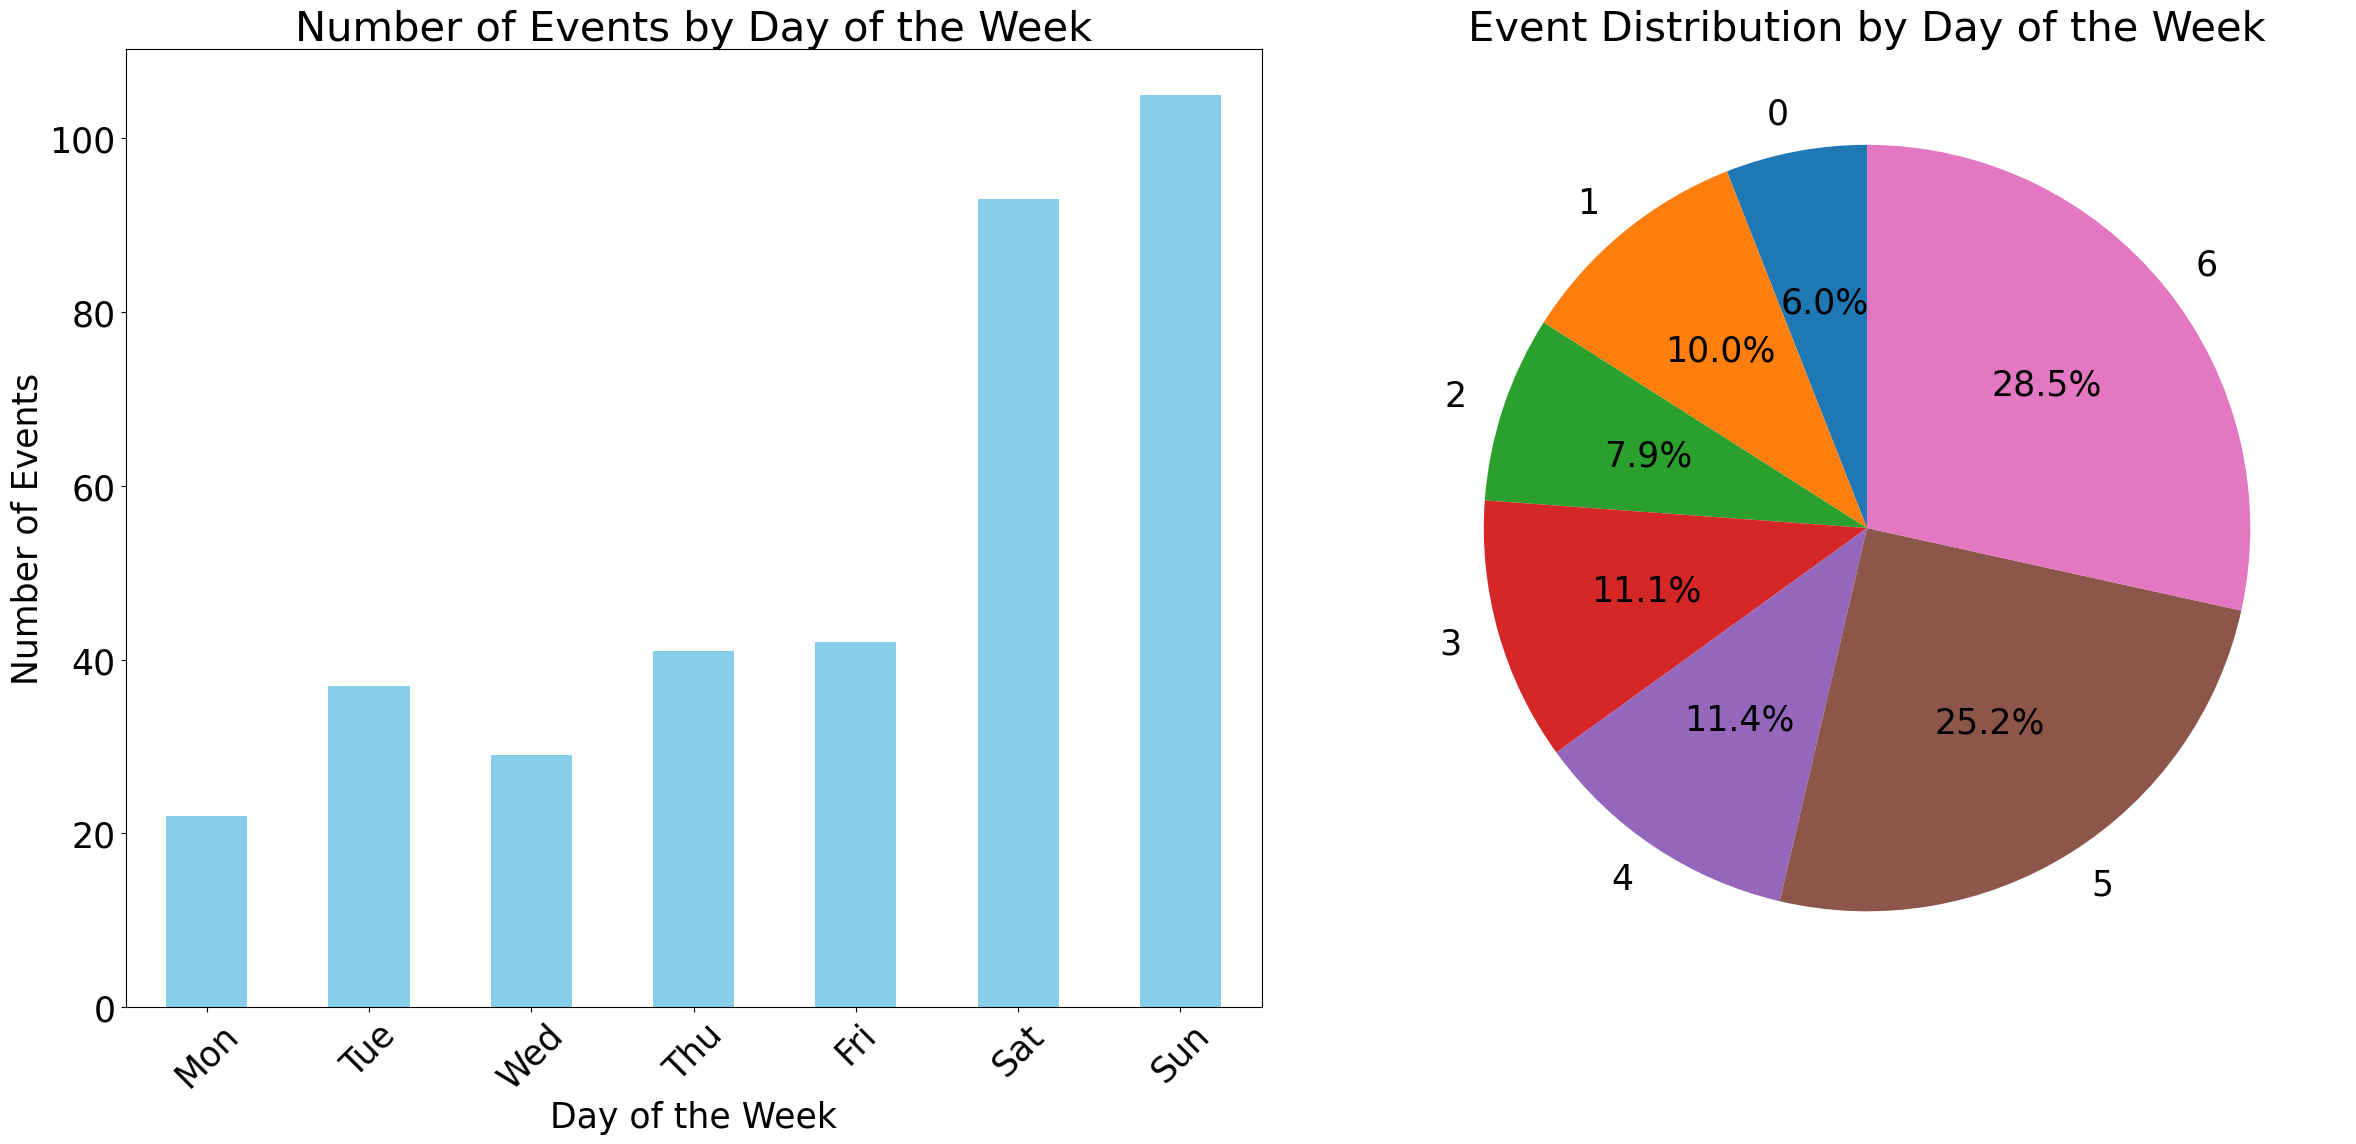

In [33]:
weekday_chart = df['weekday'].value_counts().sort_index()
plt.figure(figsize=(25, 12))
plt.rcParams.update({'font.size': 25})
# 第一个子图为柱状图
plt.subplot(1, 2, 1) # 1行2列的第1个
weekday_chart.plot(kind='bar', color='skyblue')
plt.title('Number of Events by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Events')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)

# 第二个子图为饼图
plt.subplot(1, 2, 2) # 1行2列的第2个
weekday_chart.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Event Distribution by Day of the Week')
plt.ylabel('') # 饼图通常不需要y轴标签

# 显示图表
plt.tight_layout()
plt.show()

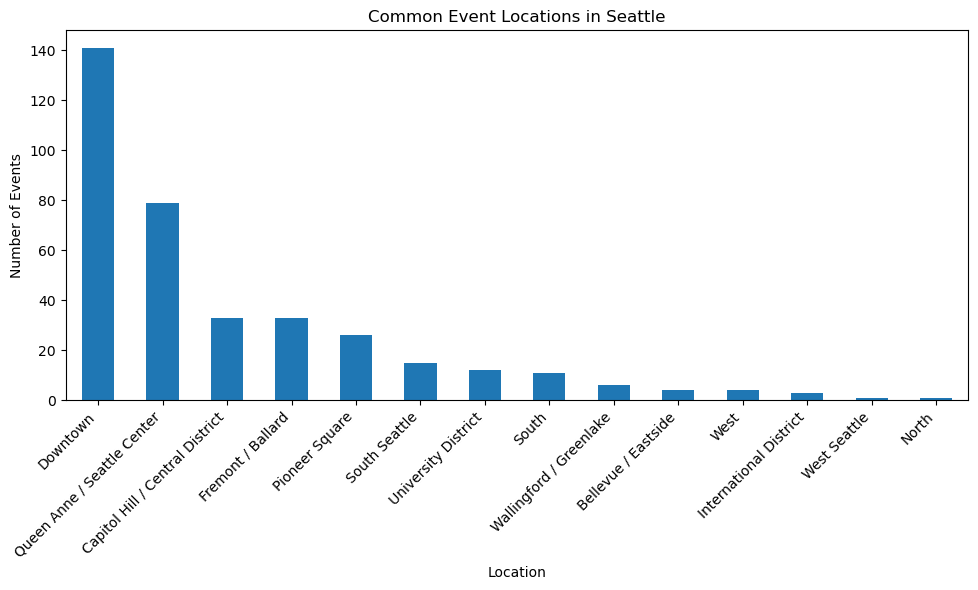

In [26]:
location_chart = df['location'].value_counts().plot(kind='bar', figsize=(10, 6))
plt.title('Common Event Locations in Seattle')
plt.xlabel('Location')
plt.ylabel('Number of Events')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()